# CS 445 Course Project

## Setup

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.spatial import Delaunay

In [2]:
#Brayden
datadir = "/Users/braydenturner/projects/MCS/cs445/course_project/" 

In [3]:
#Caleb
# datadir = "./CS445_CourseProject"

In [4]:
# %matplotlib notebook
%matplotlib widget

# Load Images

In [5]:
class Image:
    def __init__(self, path):
        self.image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB).astype('double') / 255.0

In [6]:
img1 = Image('images/whale_1.jpg') 
img2 = Image('images/whale_2.jpg')

## Point Correspondence

In [7]:
def specify_corresponding_points(img, clicked = None):
    '''
    img: input image
    clicked: ??
    return: clicked: Array of shape 2xP (number of points clicked)
            clicked[0]: array of length P containing the x coordinates
            clicked[1]: array of length P contraining y coordinates
    '''
    fig = plt.figure()
    if clicked:
        num = len(clicked[0])
        fig.set_label(f'Choose {num} corresponding points on image. Press q to quit')
    else:
        fig.set_label('Choose points on image. Press q to quit')
    plt.axis('off')
    plt.imshow(img)
    xs = []
    ys = []
    clicked = [] #CONCERN: Do we want this to be nested in the if clicked statement? 
#                          #or is the goal to reset the clicked array?

    def on_mouse_pressed(event):
        x = event.xdata
        y = event.ydata
        xs.append(x)
        ys.append(y)
        
        counter = len(xs)
        
        plt.plot(x, y, "r+")
        plt.text(x + 5, y + 5, counter, color="red")

    def onclose(event):
        clicked.append(xs)
        clicked.append(ys)
        
    def key_press(event):
        if event.key == 'q':
            print("Quitting")
            clicked.append(xs)
            clicked.append(ys)
            plt.close(fig)
            
        
        
    # Create an hard reference to the callback not to be cleared by the garbage
    # collector
    fig.canvas.mpl_connect('button_press_event', on_mouse_pressed)
    fig.canvas.mpl_connect('close_event', onclose)
    fig.canvas.mpl_connect('key_press_event', key_press)
    return clicked

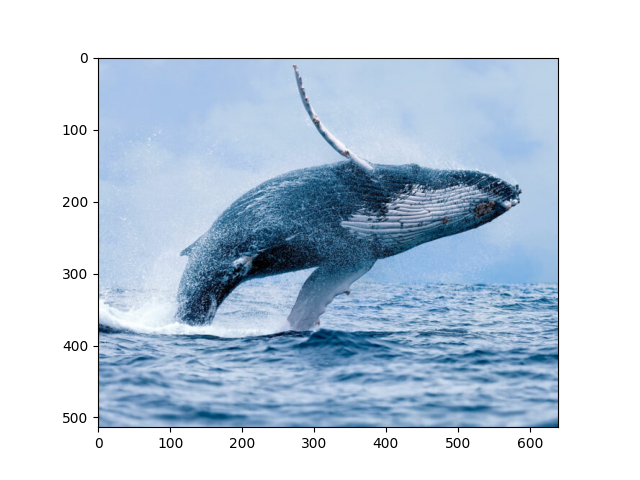

In [8]:
img1.pts = specify_corresponding_points(img1.image)

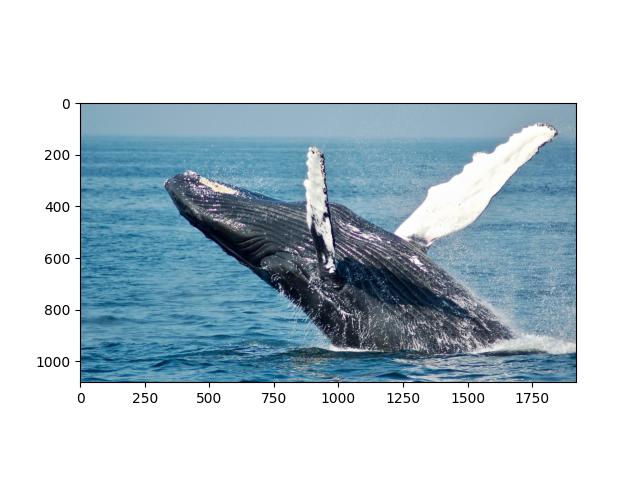

In [9]:
img2.pts = specify_corresponding_points(img2.image, img1.pts)

In [10]:
# Assert we have equal number of points
assert len(img1.pts) == len(img2.pts) and len(img1.pts[0]) == len(img2.pts[0])  and len(img1.pts[1]) == len(img2.pts[1])

## Triangulation Mesh

In [53]:
# convert to list of (x,y) touples for each point for use in scipy.spatial.Delaunay()
def toPtArray(pts, h, w):
    numPts = len(pts[0])
    points = np.zeros((numPts + 4, 2)) # add 4 points for 4 corners
    print(np)
    for i in range(len(pts[1])):
        points[i][0] = pts[0][i]
        points[i][1] = pts[1][i]

    #Add the 4 corners
    points[numPts][0] = 0
    points[numPts][1] = 0
    points[numPts+1][0] = 0
    points[numPts+1][1] = h
    points[numPts+2][0] = w
    points[numPts+2][1] = 0
    points[numPts+3][0] = w
    points[numPts+3][1] = h
    return points

In [60]:
# print(img1.pts)

In [61]:
pts1 = toPtArray(img1.pts, img1.image.shape[0], img1.image.shape[1])
pts2 = toPtArray(img2.pts, img2.image.shape[0], img2.image.shape[1])


<module 'numpy' from '/usr/local/lib/python3.9/site-packages/numpy/__init__.py'>
<module 'numpy' from '/usr/local/lib/python3.9/site-packages/numpy/__init__.py'>


In [56]:
tri1 = Delaunay(pts1)
tri2 = Delaunay(pts2)

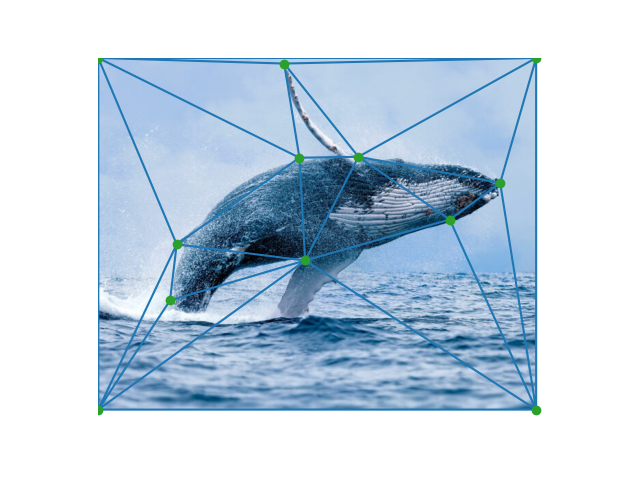

In [58]:
fig1 = plt.figure()
plt.imshow(img1.image)
plt.triplot(pts1[:,0], pts1[:,1], tri1.simplices)
plt.plot(pts1[:,0], pts1[:,1], 'o')
plt.axis('off')
plt.show()

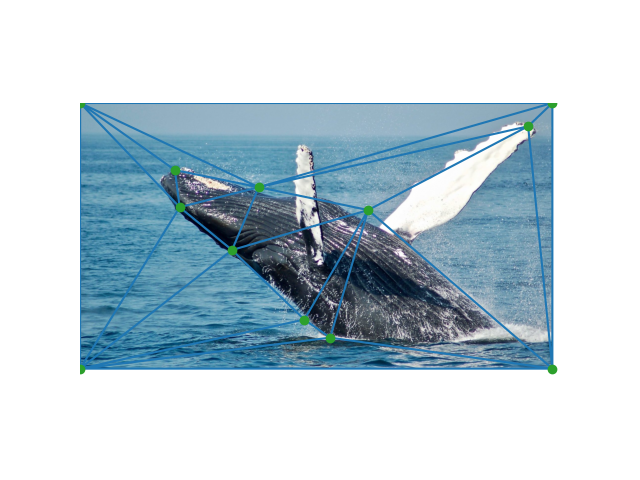

In [59]:
fig2 = plt.figure()
plt.imshow(img2.image)
plt.triplot(pts2[:,0], pts2[:,1], tri2.simplices)
plt.plot(pts2[:,0], pts2[:,1], 'o')
plt.axis('off')
plt.show()

The different attributes of the Delaunay can be found here: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Delaunay.html
What we still need to do is create some sort of correlation between the triangles of one and the triangles of the other according to Lect. 6.1.3 time: 4:39
That is probably easiest if we choose images with high correspondance to start 

## Linear Interpolation

## Affine Transformation

## Tie It All Together